In [ ]:
# !pip install statsmodels
#!pip install lets-plot

  Obtaining dependency information for lets-plot from https://files.pythonhosted.org/packages/25/22/9b3f4a01a670f0ee1030721b2ed5b826be83f28405d676858dbb3e307970/lets_plot-4.7.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pypng from https://files.pythonhosted.org/packages/3e/b9/3766cc361d93edb2ce81e2e1f87dd98f314d7d513877a342d31b30741680/pypng-0.20220715.0-py3-none-any.whl.metadata
  Obtaining dependency information for palettable from https://files.pythonhosted.org/packages/cf/f7/3367feadd4ab56783b0971c9b7edfbdd68e0c70ce877949a5dd2117ed4a0/palettable-3.3.3-py2.py3-none-any.whl.metadata
Using cached lets_plot-4.7.3-cp311-cp311-win_amd64.whl (5.9 MB)
Using cached palettable-3.3.3-py2.py3-none-any.whl (332 kB)
Using cached pypng-0.20220715.0-py3-none-any.whl (58 kB)


In [2]:
import statsmodels.api as sm
from sklearn.linear_model import Ridge

from statsmodels.tsa.stattools import adfuller, kpss, acf as sm_acf, pacf as sm_pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.arima.model import ARIMA

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

#from pandas_datareader import data as pdr

import datetime as dt
import yfinance as yf

import seaborn as sns

import datetime as dt
import time
import re

from lets_plot import *
LetsPlot.setup_html()

In [4]:
starting = "2003-01-01"
ending = "2025-09-30"

tlt =\
( # one ticker
    yf
    .download("NVDA", # ticker
              start = starting, # starting date
              end = ending,
             auto_adjust = False)                
    .droplevel("Ticker",
                axis = 1)
    # [["Close", "Volume"]]
)
tlt

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2003-01-02,0.094057,0.102583,0.103750,0.096583,0.100000,1302540000
2003-01-03,0.094057,0.102583,0.106250,0.100833,0.102917,1037496000
2003-01-06,0.101698,0.110917,0.112583,0.105000,0.105083,1033428000
2003-01-07,0.101392,0.110583,0.115667,0.109333,0.113083,1498272000
2003-01-08,0.091306,0.099583,0.110917,0.098833,0.107750,1852524000
...,...,...,...,...,...,...
2025-09-23,178.429993,178.429993,182.419998,176.210007,181.970001,192559600
2025-09-24,176.970001,176.970001,179.779999,175.399994,179.770004,143564100
2025-09-25,177.690002,177.690002,180.259995,173.130005,174.479996,191586700


In [7]:
tlt.to_csv("C:/Users/lawor/OneDrive/Desktop/2025sem3/QF603/project/tlt_data.csv", index=True)

In [5]:
#benchmark y-values to compare
IV_y_values = pd.read_csv("C:/Users/lawor/OneDrive/Desktop/2025sem3/QF603/project/MOVE_index.csv",
                          index_col = 0,
                          parse_dates = True)
IV_y_values

,MOVE_Close
Date,
NaT,^MOVE
2003-01-02,130.8699951171875
2003-01-06,124.83000183105469
2003-01-07,117.52999877929688
2003-01-08,119.41999816894531
...,...
2024-12-23,95.8499984741211
2024-12-24,96.94999694824219
2024-12-26,95.19999694824219


In [6]:
IV_values=IV_y_values.iloc[1:]
IV_values

,MOVE_Close
Date,
2003-01-02,130.8699951171875
2003-01-06,124.83000183105469
2003-01-07,117.52999877929688
2003-01-08,119.41999816894531
2003-01-09,125.08000183105469
...,...
2024-12-23,95.8499984741211
2024-12-24,96.94999694824219
2024-12-26,95.19999694824219


In [7]:
tlt_data = tlt.loc[:'2024-12-31']
tlt_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-12-24,140.189468,140.220001,141.899994,138.649994,140.000000,105157000
2024-12-26,139.899521,139.929993,140.850006,137.729996,139.699997,116205600
2024-12-27,136.980148,137.009995,139.020004,134.710007,138.550003,170582600
2024-12-30,137.460052,137.490005,140.270004,134.020004,134.830002,167734700
2024-12-31,134.260757,134.289993,138.070007,133.830002,138.029999,155659200


In [13]:
class volatility_estimator:
    def __init__(self, add_log):
        self.add_log = add_log
    
    def _check(self, df):
        required = ['High', 'Low', 'Open', 'Close']
        if not set(required).issubset (df.columns):
            raise ValueError(f"Dataframe needs columns {required}.")
        if (df[required]<=0).any().any():
            raise ValueError(f"Dataframe contains nonpositive values")
        return df
    
    def compute_square_return(self,df):
        df = self._check(df)
        log_return =  np.log(df['Close'] / df['Close'].shift(1))
        return (log_return ** 2)
    
    def compute_parkinson_estimator(self,df):
        df = self._check(df)
        log_par_var = (np.log(df['High'] / df['Low']))**2
        return ((1/(4*np.log(2))) * log_par_var)

    def compute_gk_estimator(self,df):
        df = self._check(df)
        gk_var_1 = (1/2)*(np.log(df['High']/df['Low']))**2
        gk_var_2 = (2*np.log(2)-1)*(np.log(df['Close']/df['Open']))**2
        return (gk_var_1 - gk_var_2)

    def compute_rs_estimator(self, df):
        df = self._check(df)
        rs_var_1 = (np.log(df['High']/df['Open']))*(np.log(df['High']/df['Close']))
        rs_var_2 = (np.log(df['Low']/df['Open']))*(np.log(df['Low']/df['Close']))
        return (rs_var_1 + rs_var_2)
    
    def compute_all(self,df):
        df = self._check(df).copy()
        out = pd.DataFrame(index = df.index)
        out['square_est'] = self.compute_square_return(df)
        out['parkinson_est']=self.compute_parkinson_estimator(df)
        out['gk_est'] = self.compute_gk_estimator(df)
        out['rs_est'] = self.compute_rs_estimator(df)

        if self.add_log:
            for col in ['square_est', 'parkinson_est', 'gk_est', 'rs_est']:
                out[col + '_log'] = np.log(out[col].where(out[col] > 0))
        
        return out

In [30]:
# premodel diagnotics on the data assumptions.
import warnings


class Vol_Est_Check:

    def __init__(self, 
                 alpha, 
                 lb_lags,
                 kpss_reg, 
                 kpss_nlags,
                 acf_pacf_nlags):
        # alpha: significant level
        # lb_lags: lags to report to Ljung box
        # kpss: reg[c - level, ct - trend], nlags: auto or int
        #ADF passed stationary when p<0.05 (reject H_0 of unit root)
        self.alpha = alpha
        self.lb_lags = tuple(lb_lags)
        self.kpss_reg = kpss_reg
        self.kpss_nlags = kpss_nlags
        self.acf_pacf_nlags = acf_pacf_nlags

    def ADF(self, df, name):
        df = df.dropna()
        series_name = name or getattr (df, 'name', 'series')
        
        stat, p, lags, nobs, crit, icbest = adfuller(df, autolag = 'AIC')
        stationary_flag = p <= self.alpha
        return {"adf_stat": stat, 
                "adf_p": p,
                "adf_lags": lags, 
                "adf_nobs": nobs, 
                "adf_crit": crit,
                'adf_icbest': icbest,
                'adf_stationary_flag': stationary_flag,
                'adf_decision': (f'{series_name}: Reject H0 -> stationary'
                    if stationary_flag
                    else 'Fail to reject H0 -> non-stationary'
                )} 


    def KPSS(self,df, name, nlags): 
        df = df.dropna()
        series_name = name or getattr (df, 'name', 'series')
        
        with warnings.catch_warnings():
            warnings.simplefilter('ignore')
            stat, p, lags, crit = kpss(df,
                                       regression=self.kpss_reg, 
                                       nlags=nlags)
        
        stationary_flag = (p > self.alpha)
        return {
            "kpss_stat": stat, # stat < crit -> series is stationary
            "kpss_p": p, # p >0.05  -> series is stationary
            "kpss_lags": lags, 
            "kpss_crit": crit,
            'kpss_reg': self.kpss_reg,
            'kpss_stationary_flag': stationary_flag,
            'kpss_decision': (f'{series_name}: Fail to reject H0 ->stationary'
            if stationary_flag
            else f"{series_name}: Reject H0 -> Non-stationary")
            }


    def ljung_box(self, df): # reject H0 -> serial correlation
        df = df.dropna()
        lb = acorr_ljungbox(df, lags=list(self.lb_lags), return_df=True)
        out={}
        for L in self.lb_lags:
            out[f'lb_stat_{L}'] = float(lb.loc[L, "lb_stat"]) # stat for each lag h
            out[f"lb_p_{L}"]   = float(lb.loc[L, "lb_pvalue"])  # p-value

        out['white_noise_flag'] = all(out[f'lb_p_{L}'] > self.alpha for L in self.lb_lags)
        out["lb_lags_used"] = self.lb_lags
        out['n_obs'] = len(df)
        out['name'] = getattr(df, 'name', 'series')
        return out
    
    def compute_acf(self, df, nlags, alpha):
        df=df.dropna()
        nlags = nlags or self.acf_pacf_nlags
        vals, conf = sm_acf(df,
                            nlags = nlags,
                            alpha = alpha,
                            fft = True,
                            adjusted = False)
        return {'acf_vals': vals, 
                'acf_confint': conf} #shape(nlags+1,2)

    
    def compute_pacf(self, df, nlags, alpha, method: str = 'ywmle'):
        df=df.dropna()
        nlags = nlags or self.acf_pacf_nlags
        vals, conf = sm_pacf(df, 
                             nlags=nlags, 
                             alpha=alpha, 
                             method=method)
        return {
            'pacf_vals': vals,
            'pacf_confint': conf,
            'pacf_method': method
            }
    
    def plot_acf(self, df, nlags, title:str = None):
        df = df.dropna()
        nlags = nlags or self.acf_pacf_nlags
        plot_acf(df, lags=nlags)
        plt.title(title or f"ACF ({getattr(df,'name','series')})")
        plt.show()

    def plot_pacf(self, df, nlags, title: str = None, method: str = 'ywmle'):
        df = df.dropna()
        nlags = nlags or self.acf_pacf_nlags
        plot_pacf(df, lags=nlags)
        plt.title(title or f"PACF ({getattr(df,'name','series')})")
        plt.show()

    def summarize_series(self, df, name = None): #for 1 estimator
        series_name = name or getattr (df, 'name', 'series')
        results = {}
        results.update(self.ADF(df, name = name))
        results.update(self.KPSS(df, name = name, nlags=self.kpss_nlags))

        lb = self.ljung_box(df)
        results.update({f"lb_{k}": v for k, v in lb.items()})

        return results
    

In [ ]:
#HAR model function
from typing import Iterable, Optional, Dict, Tuple





In [15]:
# to compute the estimators
vol_calc = volatility_estimator(add_log=True)
vol_results = vol_calc.compute_all(tlt_data)
vol_results

,square_est,parkinson_est,gk_est,rs_est,square_est_log,parkinson_est_log,gk_est_log,rs_est_log
Date,,,,,,,,
2003-01-02,NaN,0.001848,0.002311,0.002512,NaN,-6.293622,-6.070196,-5.986735
2003-01-03,0.000000,0.000988,0.001365,0.001471,NaN,-6.920184,-6.596536,-6.521524
2003-01-06,0.006101,0.001754,0.001303,0.001071,-5.099275,-6.346020,-6.642773,-6.839054
2003-01-07,0.000009,0.001144,0.001393,0.001399,-11.607765,-6.773296,-6.576477,-6.572053
2003-01-08,0.010978,0.004799,0.004253,0.003776,-4.511882,-5.339339,-5.460165,-5.579203
...,...,...,...,...,...,...,...,...
2024-12-24,0.000015,0.000194,0.000267,0.000270,-11.078159,-8.549591,-8.226512,-8.218378
2024-12-26,0.000004,0.000181,0.000250,0.000279,-12.360045,-8.617141,-8.294682,-8.185067
2024-12-27,0.000445,0.000358,0.000448,0.000525,-7.718067,-7.935732,-7.711482,-7.551812


In [16]:
vol_results.columns

Index(['square_est', 'parkinson_est', 'gk_est', 'rs_est', 'square_est_log',
       'parkinson_est_log', 'gk_est_log', 'rs_est_log'],
      dtype='object')

In [20]:
vol_estimator_check = vol_results[['square_est_log',
                                  'parkinson_est_log', 
                                    'gk_est_log', 
                                    'rs_est_log']]
vol_estimator_check

,square_est_log,parkinson_est_log,gk_est_log,rs_est_log
Date,,,,
2003-01-02,NaN,-6.293622,-6.070196,-5.986735
2003-01-03,NaN,-6.920184,-6.596536,-6.521524
2003-01-06,-5.099275,-6.346020,-6.642773,-6.839054
2003-01-07,-11.607765,-6.773296,-6.576477,-6.572053
2003-01-08,-4.511882,-5.339339,-5.460165,-5.579203
...,...,...,...,...
2024-12-24,-11.078159,-8.549591,-8.226512,-8.218378
2024-12-26,-12.360045,-8.617141,-8.294682,-8.185067
2024-12-27,-7.718067,-7.935732,-7.711482,-7.551812


In [31]:
vol_check = Vol_Est_Check(
    alpha=0.05,
    lb_lags=(10, 20),
    kpss_reg='c',
    kpss_nlags='auto',
    acf_pacf_nlags=40
)

for col in vol_estimator_check.columns:
    print(f"=== Diagnostics for {col} ===")
    result = vol_check.summarize_series(vol_estimator_check[col], name=col)
    print(result, "\n")

=== Diagnostics for square_est_log ===
{'adf_stat': -6.28061503475163, 'adf_p': 3.804588106770496e-08, 'adf_lags': 32, 'adf_nobs': 5463, 'adf_crit': {'1%': -3.4315475792297763, '5%': -2.8620692103923964, '10%': -2.5670516976361606}, 'adf_icbest': 24078.90269288385, 'adf_stationary_flag': True, 'adf_decision': 'square_est_log: Reject H0 -> stationary', 'kpss_stat': 1.266604689465732, 'kpss_p': 0.01, 'kpss_lags': 32, 'kpss_crit': {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}, 'kpss_reg': 'c', 'kpss_stationary_flag': False, 'kpss_decision': 'square_est_log: Reject H0 -> Non-stationary', 'lb_lb_stat_10': 795.1375211577573, 'lb_lb_p_10': 2.2903367633597235e-164, 'lb_lb_stat_20': 1387.2131706196883, 'lb_lb_p_20': 6.115149038282916e-282, 'lb_white_noise_flag': False, 'lb_lb_lags_used': (10, 20), 'lb_n_obs': 5496, 'lb_name': 'square_est_log'} 

=== Diagnostics for parkinson_est_log ===
{'adf_stat': -5.276030589737243, 'adf_p': 6.137643627029081e-06, 'adf_lags': 32, 'adf_nobs': 5504, 

In [32]:
summary_rows = []
for col in vol_estimator_check.columns:
    res = vol_check.summarize_series(vol_estimator_check[col], name=col)
    summary_rows.append({
        "Estimator": col,
        "ADF stat": res.get("adf_stat"),
        "ADF p": res.get("adf_p"),
        "ADF pass (p≤α)": res.get("adf_p") is not None and res["adf_p"] <= vol_check.alpha,
        "KPSS stat": res.get("kpss_stat"),
        "KPSS p": res.get("kpss_p"),
        "KPSS pass (p>α)": res.get("kpss_p") is not None and res["kpss_p"] > vol_check.alpha,
        "LB p @10": res.get("lb_lb_p_10"),
        "LB p @20": res.get("lb_lb_p_20"),
        "White noise (LB)": res.get("lb_white_noise_flag"),
    })

diag_tbl = pd.DataFrame(summary_rows).set_index("Estimator")

# Convenience column: both stationarity tests agree
diag_tbl["Stationary (ADF∩KPSS)"] = diag_tbl["ADF pass (p≤α)"] & diag_tbl["KPSS pass (p>α)"]

# Pretty formatting
with pd.option_context('display.float_format', lambda v: f"{v:.4g}"):
    display(diag_tbl)

,ADF stat,ADF p,ADF pass (p≤α),KPSS stat,KPSS p,KPSS pass (p>α),LB p @10,LB p @20,White noise (LB),Stationary (ADF∩KPSS)
Estimator,,,,,,,,,,
square_est_log,-6.281,3.805e-08,True,1.267,0.01,False,2.29e-164,6.115e-282,False,False
parkinson_est_log,-5.276,6.138e-06,True,1.84,0.01,False,0,0,False,False
gk_est_log,-6.431,1.696e-08,True,1.897,0.01,False,0,0,False,False
rs_est_log,-6.642,5.366e-09,True,1.941,0.01,False,0,0,False,False


=== square_est_log ===


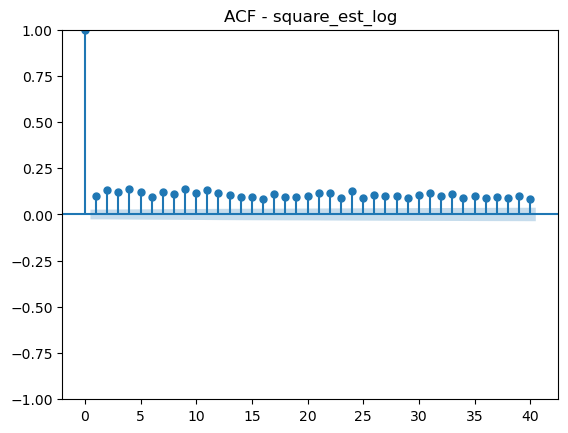

c:\Users\lawor\anaconda3v0\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


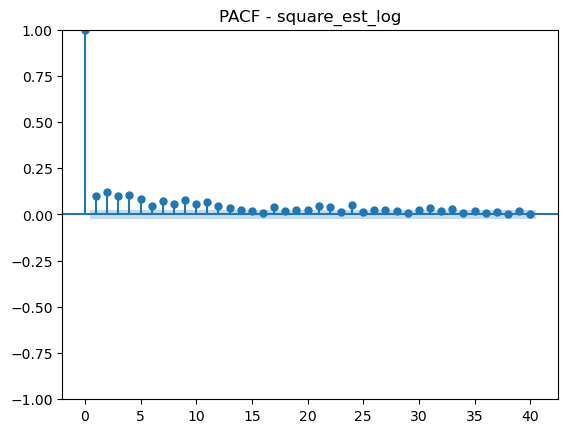

=== parkinson_est_log ===


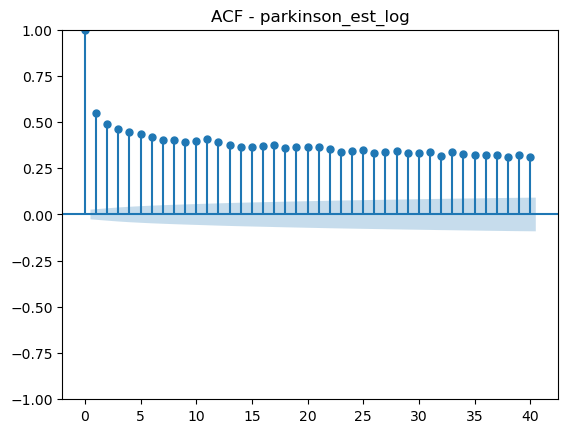

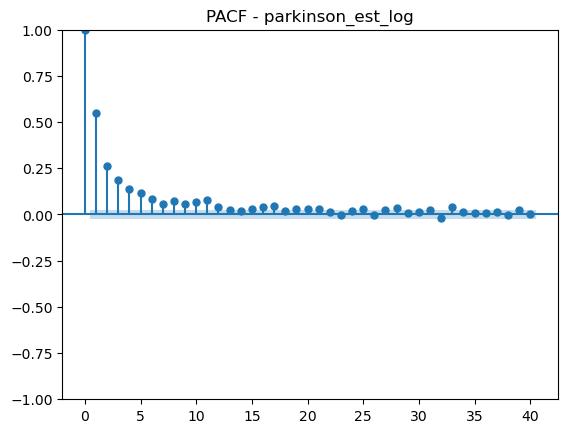

=== gk_est_log ===


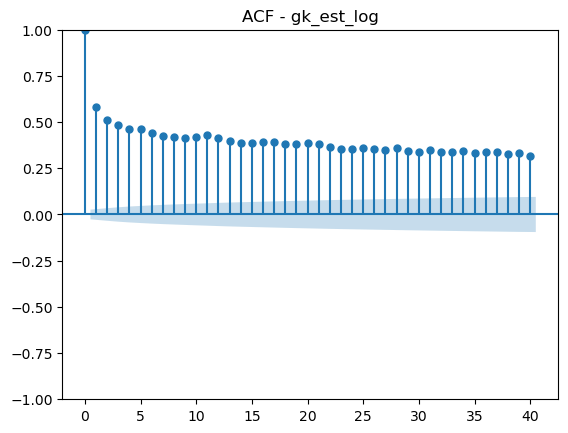

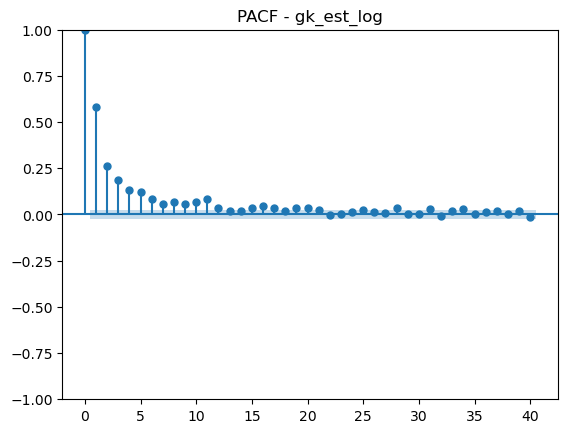

=== rs_est_log ===


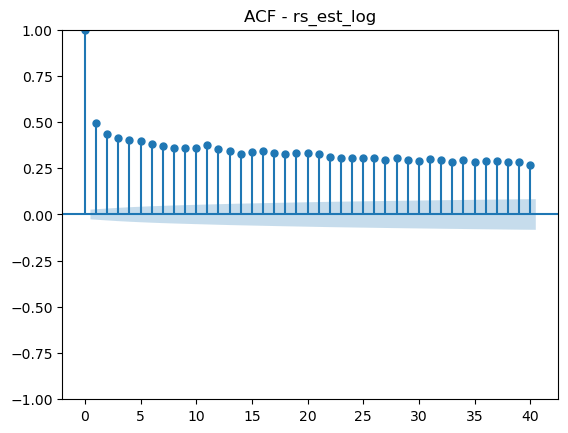

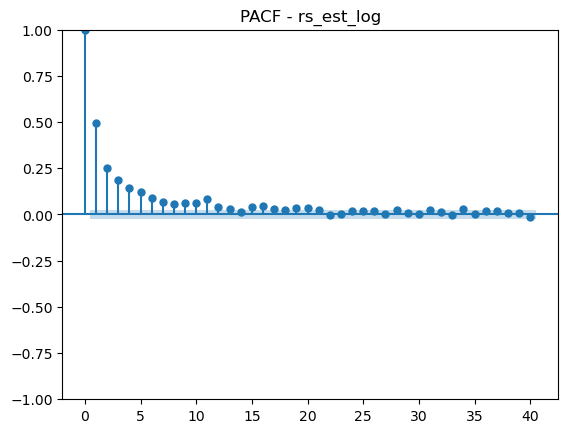

In [33]:
# Plot ACF and PACF for each log-vol estimator
for col in vol_estimator_check.columns:
    print(f"=== {col} ===")
    vol_check.plot_acf(vol_estimator_check[col], nlags=40, title=f"ACF - {col}")
    vol_check.plot_pacf(vol_estimator_check[col], nlags=40, title=f"PACF - {col}")

### Premodel check on the data
- All estimators pass the ADF test, indicating it is mean stationary. Can proceed with HAR model fitting.
- HAR model requires the data to be covariance-stationary, which your ADF result already supports.
- All fail the KPSS test, suggesting that there is trend-stationary / near-unit-root behaviour, which is expected in volatility data case. 
- All ACF shows slow decay, indicating long memory.
- PACF has significant spikes up to ~5–15 lags → short-term AR effects + persistent long-term influence.

### What it means in HAR (1,5,22) models?
- HAR(1) → daily dependence (lag 1)
- HAR(5) → weekly average dependence (captures medium decay)
- HAR(22) → monthly average dependence (captures long tail)

In [ ]:
n_total = len(vol_estimator_check)
split_point = int(0.7 * n_total)

train_val = vol_estimator_check.iloc[:split_point]
test = vol_estimator_check.iloc[split_point:]
